In [146]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

In [147]:
from google.colab import files
uploaded=files.upload()

Saving Company_Data (1).csv to Company_Data (1) (2).csv


In [148]:
data=pd.read_csv('Company_Data (1).csv')
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [149]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [150]:
data.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [151]:
data.shape

(400, 11)

In [152]:
data.corr()

<ipython-input-152-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
Sales,1.000000,0.064079,0.151951,0.269507,0.050471,-0.444951,-0.231815,-0.051955
CompPrice,0.064079,1.000000,-0.080653,-0.024199,-0.094707,0.584848,-0.100239,0.025197
Income,0.151951,-0.080653,1.000000,0.058995,-0.007877,-0.056698,-0.004670,-0.056855
Advertising,0.269507,-0.024199,0.058995,1.000000,0.265652,0.044537,-0.004557,-0.033594
Population,0.050471,-0.094707,-0.007877,0.265652,1.000000,-0.012144,-0.042663,-0.106378
Price,-0.444951,0.584848,-0.056698,0.044537,-0.012144,1.000000,-0.102177,0.011747
Age,-0.231815,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,1.000000,0.006488
Education,-0.051955,0.025197,-0.056855,-0.033594,-0.106378,0.011747,0.006488,1.000000


In [153]:
data.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [154]:
data.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

In [155]:
data['Sales']=data['Sales'].map(lambda x:1 if x<7 else 0)

In [156]:
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,0,138,73,11,276,120,Bad,42,17,Yes,Yes
1,0,111,48,16,260,83,Good,65,10,Yes,Yes
2,0,113,35,10,269,80,Medium,59,12,Yes,Yes
3,0,117,100,4,466,97,Medium,55,14,Yes,Yes
4,1,141,64,3,340,128,Bad,38,13,Yes,No


In [157]:
data['Sales'].value_counts()

0    216
1    184
Name: Sales, dtype: int64

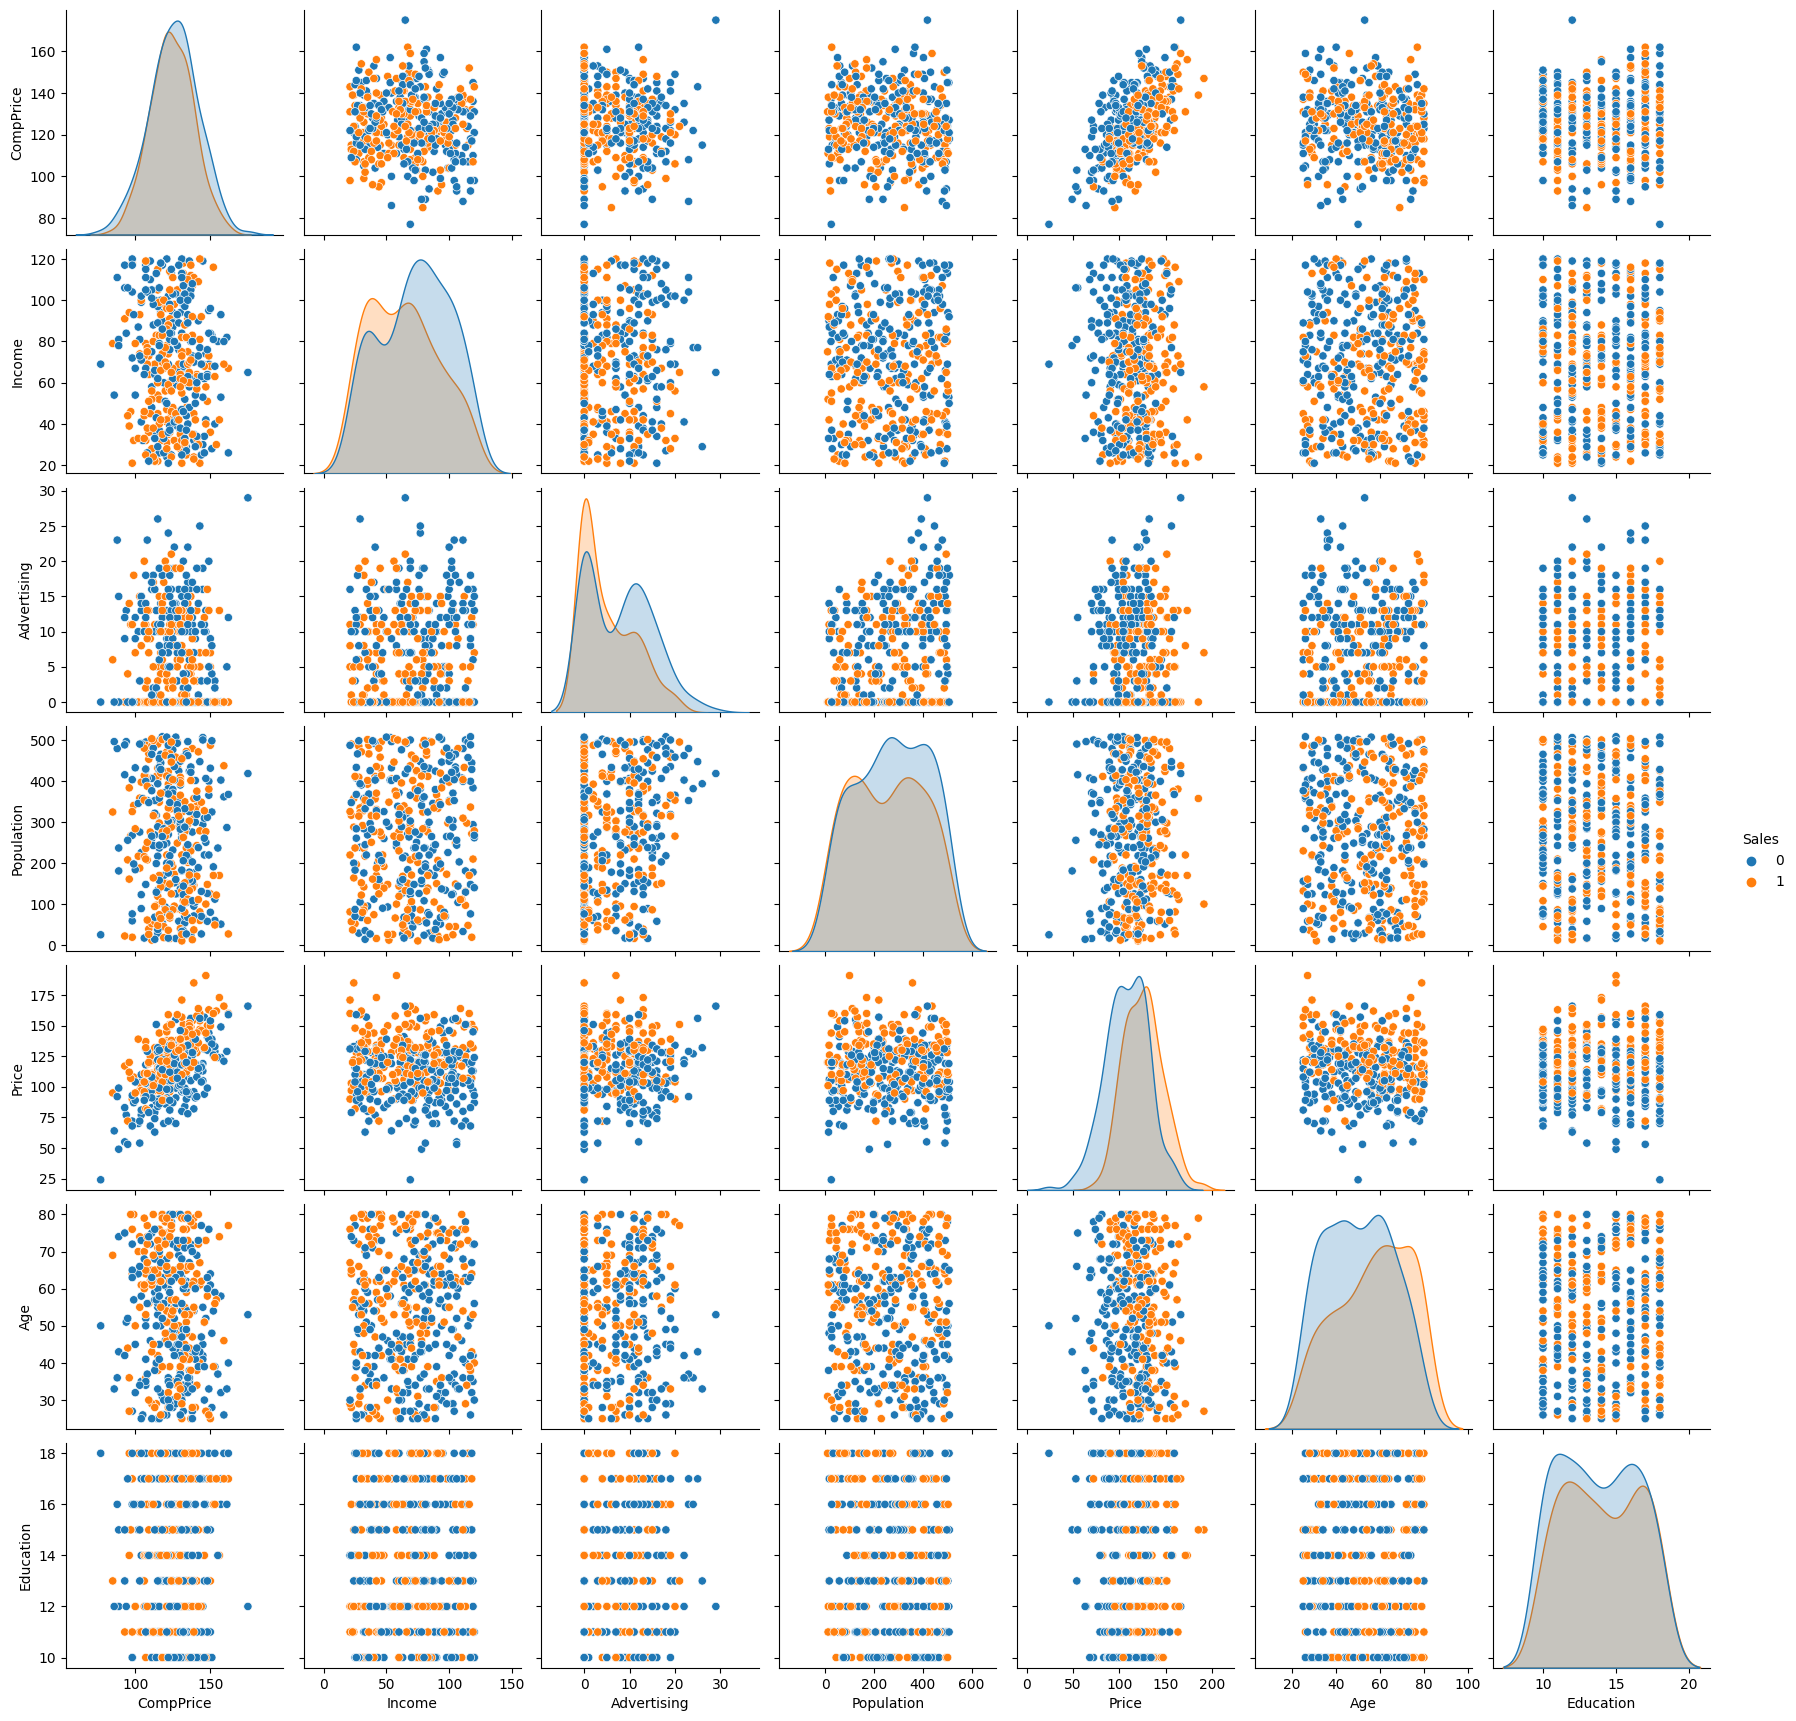

In [158]:
sns.pairplot(data, hue='Sales')

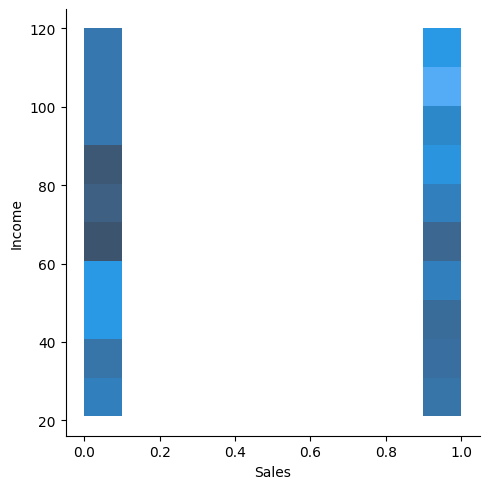

In [159]:
sns.displot(data, x='Sales',y='Income')

<Axes: >

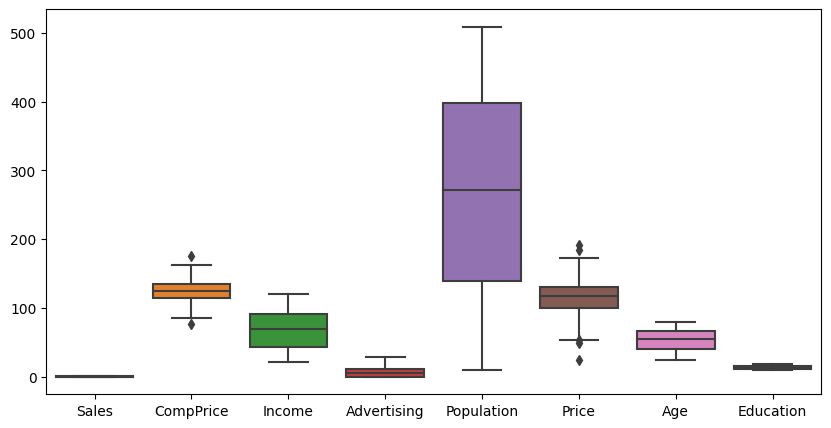

In [160]:
plt.figure(figsize=[10,5])
sns.boxplot(data)

<Axes: >

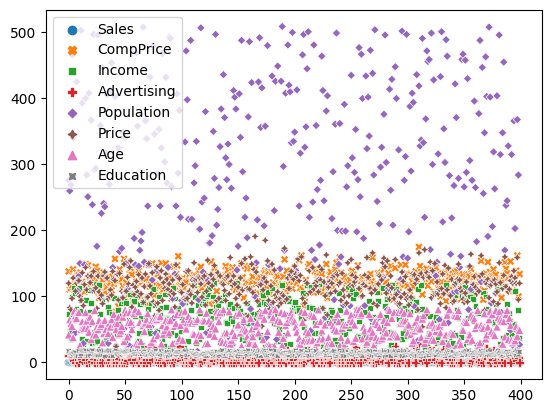

In [161]:
sns.scatterplot(data)

In [162]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['ShelveLoc']=le.fit_transform(data['ShelveLoc'])
data['Urban']=le.fit_transform(data['Urban'])
data['US']=le.fit_transform(data['US'])

In [163]:
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,0,138,73,11,276,120,0,42,17,1,1
1,0,111,48,16,260,83,1,65,10,1,1
2,0,113,35,10,269,80,2,59,12,1,1
3,0,117,100,4,466,97,2,55,14,1,1
4,1,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,0,138,108,17,203,128,1,33,14,1,1
396,1,139,23,3,37,120,2,55,11,0,1
397,0,162,26,12,368,159,2,40,18,1,1
398,1,100,79,7,284,95,0,50,12,1,1


In [164]:
x=data.iloc[:,1:]
y=data.iloc[:,0]

In [165]:
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.2)

In [166]:
model=RandomForestClassifier(n_estimators=100,max_features=3)
model.fit(x_train,y_train)

RandomForestClassifier(max_features=3)

In [167]:
y_pred=model.predict(x_test)
y_pred

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1])

In [168]:
y_pred_df=pd.DataFrame({'actual':y_test,'predicted':y_pred})
y_pred_df

,actual,predicted
268,1,0
325,0,0
78,1,1
42,0,0
284,1,1
...,...,...
92,1,0
53,1,0
266,0,0
360,0,0


In [169]:
report=classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.71      0.87      0.78        39
           1       0.84      0.66      0.74        41

    accuracy                           0.76        80
   macro avg       0.78      0.77      0.76        80
weighted avg       0.78      0.76      0.76        80



In [170]:
accuracy=accuracy_score(y_test,y_pred)
accuracy


0.7625

#bagging classifier


In [171]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
classifier=DecisionTreeClassifier()
model=BaggingClassifier(classifier,n_estimators=100)
model.fit(x_train,y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100)

In [172]:
y_pred=model.predict(x_test)
y_pred

array([0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1])

In [173]:
y_pred_df=pd.DataFrame({'actual':y_test,'predicted':y_pred})
y_pred_df

,actual,predicted
268,1,0
325,0,0
78,1,1
42,0,0
284,1,1
...,...,...
92,1,0
53,1,0
266,0,0
360,0,0


In [174]:
report=classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.68      0.77      0.72        39
           1       0.75      0.66      0.70        41

    accuracy                           0.71        80
   macro avg       0.72      0.71      0.71        80
weighted avg       0.72      0.71      0.71        80



In [175]:
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.7125

#2)FRAUD DATA


In [176]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

from sklearn.metrics import accuracy_score,classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier


In [177]:
from google.colab import files
uploaded=files.upload()

Saving Fraud_check (1).csv to Fraud_check (1) (2).csv


In [178]:
data=pd.read_csv('Fraud_check (1).csv')
data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [179]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [180]:
data.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [181]:
data.corr

<bound method DataFrame.corr of     Undergrad Marital.Status  Taxable.Income  City.Population  \
0          NO         Single           68833            50047   
1         YES       Divorced           33700           134075   
2          NO        Married           36925           160205   
3         YES         Single           50190           193264   
4          NO        Married           81002            27533   
..        ...            ...             ...              ...   
595       YES       Divorced           76340            39492   
596       YES       Divorced           69967            55369   
597        NO       Divorced           47334           154058   
598       YES        Married           98592           180083   
599        NO       Divorced           96519           158137   

     Work.Experience Urban  
0                 10   YES  
1                 18   YES  
2                 30   YES  
3                 15   YES  
4                 28    NO  
..           

In [182]:
data.shape

(600, 6)

In [183]:
data['Taxable.Income']=data['Taxable.Income'].map(lambda x:0 if x<30000 else 1 )

In [184]:
data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,1,50047,10,YES
1,YES,Divorced,1,134075,18,YES
2,NO,Married,1,160205,30,YES
3,YES,Single,1,193264,15,YES
4,NO,Married,1,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,1,39492,7,YES
596,YES,Divorced,1,55369,2,YES
597,NO,Divorced,1,154058,0,YES
598,YES,Married,1,180083,17,NO


In [231]:
data['Taxable.Income'].value_counts()

1    476
0    124
Name: Taxable.Income, dtype: int64

<Axes: >

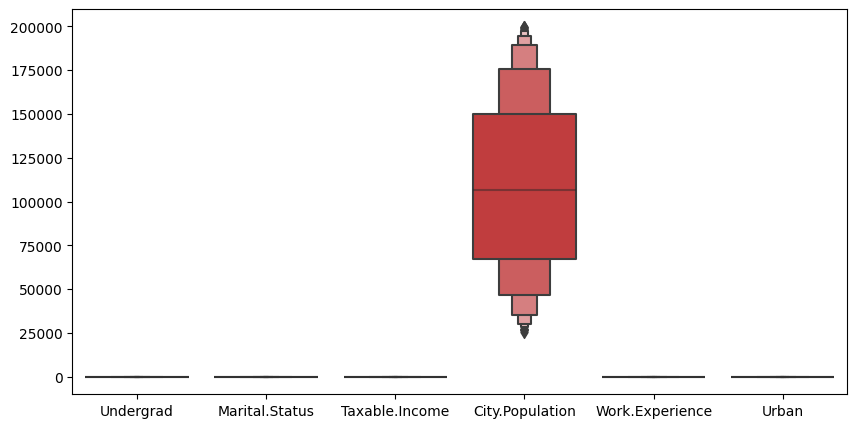

In [242]:
plt.figure(figsize=[10,5])
sns.boxenplot(data)

<ipython-input-187-946844e4f3c9>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Taxable.Income'])


<Axes: xlabel='Taxable.Income', ylabel='Density'>

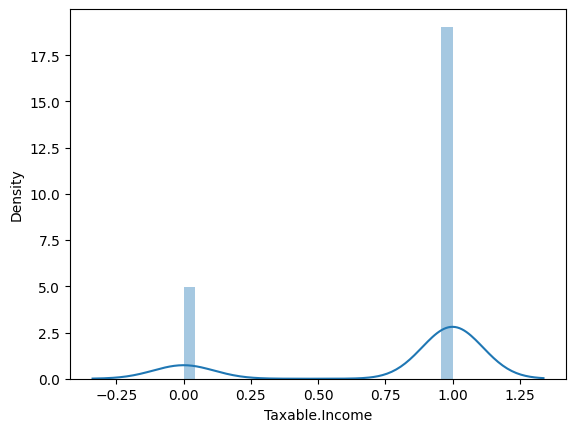

In [187]:
sns.distplot(data['Taxable.Income'])

<Axes: xlabel='Taxable.Income', ylabel='count'>

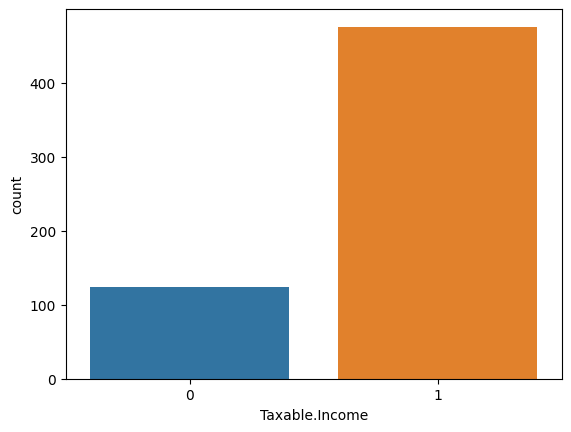

In [188]:
sns.countplot(x=data['Taxable.Income'])

In [189]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['Undergrad']=le.fit_transform(data['Undergrad'])
data['Marital.Status']=le.fit_transform(data['Marital.Status'])
data['Urban']=le.fit_transform(data['Urban'])


In [190]:
data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,1,50047,10,1
1,1,0,1,134075,18,1
2,0,1,1,160205,30,1
3,1,2,1,193264,15,1
4,0,1,1,27533,28,0
...,...,...,...,...,...,...
595,1,0,1,39492,7,1
596,1,0,1,55369,2,1
597,0,0,1,154058,0,1
598,1,1,1,180083,17,0


In [191]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Undergrad        600 non-null    int64
 1   Marital.Status   600 non-null    int64
 2   Taxable.Income   600 non-null    int64
 3   City.Population  600 non-null    int64
 4   Work.Experience  600 non-null    int64
 5   Urban            600 non-null    int64
dtypes: int64(6)
memory usage: 28.2 KB


<Axes: >

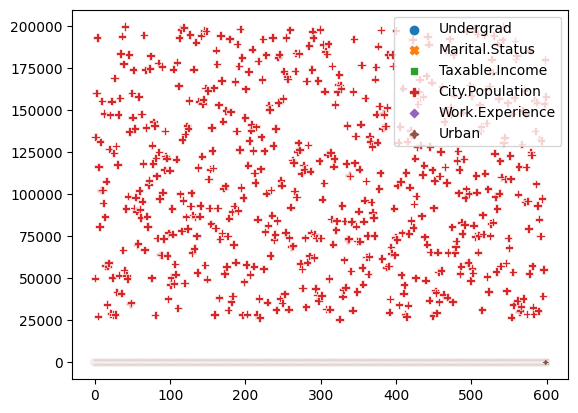

In [192]:
sns.scatterplot(data)

<Axes: >

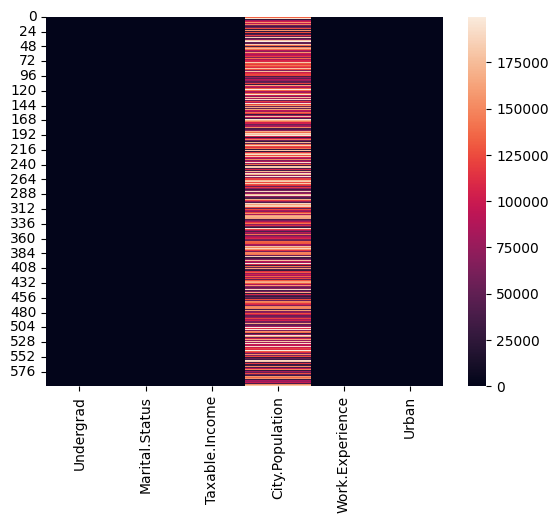

In [243]:
sns.heatmap(data)

In [193]:
x=data.iloc[:,1:]
y=data.iloc[:,0]


In [194]:
x,y

(     Marital.Status  Taxable.Income  City.Population  Work.Experience  Urban
 0                 2               1            50047               10      1
 1                 0               1           134075               18      1
 2                 1               1           160205               30      1
 3                 2               1           193264               15      1
 4                 1               1            27533               28      0
 ..              ...             ...              ...              ...    ...
 595               0               1            39492                7      1
 596               0               1            55369                2      1
 597               0               1           154058                0      1
 598               1               1           180083               17      0
 599               0               1           158137               16      0
 
 [600 rows x 5 columns],
 0      0
 1      1
 2      0
 3     

In [195]:
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.2)

In [196]:
model=RandomForestClassifier(n_estimators=100, max_features=3)
model.fit(x_train,y_train)

RandomForestClassifier(max_features=3)

In [197]:
y_pred_test=model.predict(x_test)
y_pred_test

array([0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1])

In [198]:
y_pred_df=pd.DataFrame({'actual':y_pred_test,'predicted':y_test})
y_pred_df

,actual,predicted
75,0,0
328,1,0
389,0,1
338,1,1
371,0,1
...,...,...
415,1,0
563,1,1
400,0,1
329,1,0


In [199]:
report= classification_report(y_pred_test,y_test)
print(report)

              precision    recall  f1-score   support

           0       0.43      0.56      0.49        52
           1       0.57      0.44      0.50        68

    accuracy                           0.49       120
   macro avg       0.50      0.50      0.49       120
weighted avg       0.51      0.49      0.49       120



#bagging classifier


In [213]:
from sklearn.tree import DecisionTreeClassifier
Classifier=DecisionTreeClassifier()
model=BaggingClassifier(classifier,n_estimators=100)
model.fit(x_train,y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100)

In [214]:
model

BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100)

In [227]:
y_pred=model.predict(x_test)
y_pred


array([1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1])

In [228]:
y_pred_df=pd.DataFrame({'actual':y_test,'predicted':y_pred})
y_pred_df

,actual,predicted
75,0,1
328,0,1
389,1,0
338,1,1
371,1,0
...,...,...
415,0,1
563,1,1
400,1,0
329,0,1


In [229]:
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.5

In [230]:
classifictn_report = classification_report(y_test,y_pred)
print(classifictn_report)


              precision    recall  f1-score   support

           0       0.56      0.46      0.51        67
           1       0.45      0.55      0.49        53

    accuracy                           0.50       120
   macro avg       0.50      0.50      0.50       120
weighted avg       0.51      0.50      0.50       120



#the end
